# Feature Selection

## Load dữ liệu sau khi đã Label Encoding

In [37]:
import pandas as pd
import numpy as np

data = pd.read_csv('../../data/interim/train_LabelEncoder.csv')

In [38]:
X = data.drop('Activity', axis=1)
y = data['Activity']
y[:-10].head()

0    STANDING
1    STANDING
2    STANDING
3    STANDING
4    STANDING
Name: Activity, dtype: object

## Sử dụng Mutual Information để đánh giá các đặc trưng

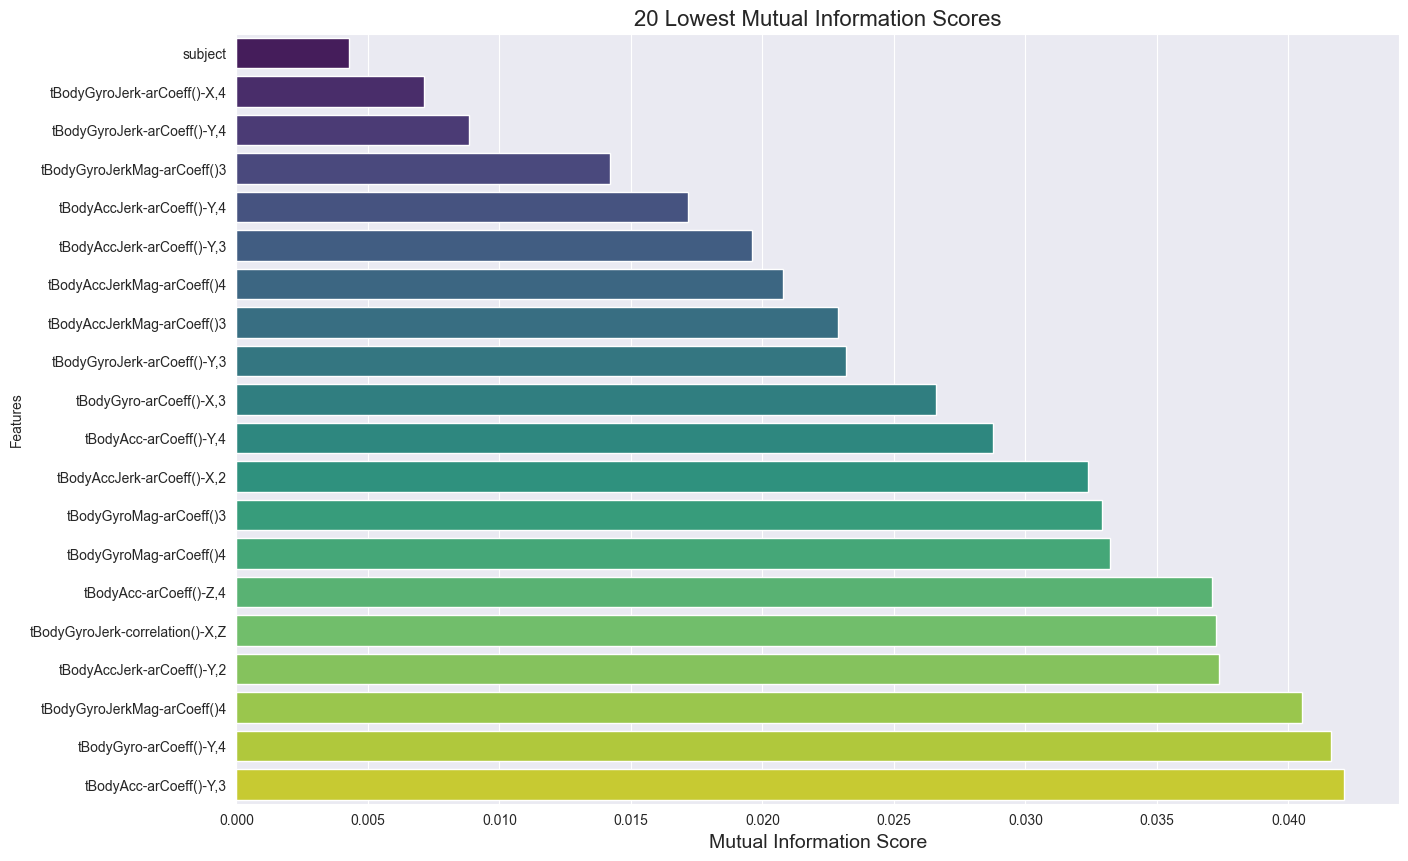

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif

# Tính Mutual Information Score cho từng đặc trưng
mi_scores = mutual_info_classif(X, y, random_state=42)
mi_scores = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)
# Lấy 20 giá trị thấp nhất
mi_scores_lowest = mi_scores.nsmallest(20)

# Plot
plt.figure(figsize=(15, 10))
sns.barplot(
    x=mi_scores_lowest.values,
    y=mi_scores_lowest.index,
    hue=mi_scores_lowest.index,
    palette='viridis',
    dodge=False
)

plt.title('20 Lowest Mutual Information Scores', fontsize=16)
plt.xlabel('Mutual Information Score', fontsize=14)
plt.ylabel('Features')
plt.show()

**Nhận xét:** 

* Có thể thấy subject (mã thứ tự của các tình nguyện viên) có Mutual Information Score thấp nhất.
* Điều này cho thấy subject không ảnh hưởng đến việc phân loại hoạt động. Đồng thời để đảm bảo sự công bằng trong thực tế rằng mô hình không dự đoán cho riêng 30 tình nguyện viên. Chúng tôi sẽ loại bỏ đặc trưng này khỏi tập dữ liệu.

## Loại bỏ đặc trưng 'subject'

In [40]:
data_train = pd.read_csv('../../data/interim/train_LabelEncoder.csv')
data_test = pd.read_csv('../../data/interim/test_LabelEncoder.csv')

data_train = data_train.drop('subject', axis=1)
data_test = data_test.drop('subject', axis=1)

## Lưu dữ liệu sau khi loại bỏ đặc trưng 'subject'

In [41]:
data_train.to_csv('../../data/processed/train_LabelEncoder_noSubject.csv', index=False)
data_test.to_csv('../../data/processed/test_LabelEncoder_noSubject.csv', index=False)

print('Du lieu da duoc luu vao data/interim')

Du lieu da duoc luu vao data/interim


### Lưu trữ các đặc trưng được chọn

In [42]:
features = data_train[:0]
features.to_csv('../../data/processed/features.csv', index=False)
features

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity,Activity_code


### Loại bỏ các đặc trưng có tương quan cao

In [43]:
import pandas as pd
import numpy as np

# Đọc dữ liệu
train_df = pd.read_csv("../../data/processed/train_LabelEncoder_noSubject.csv")
test_df = pd.read_csv("../../data/processed/test_LabelEncoder_noSubject.csv")

# Lưu nhãn
train_labels = train_df["Activity"]
test_labels = test_df["Activity"]

train_features = train_df.drop("Activity", axis=1)
test_features = test_df.drop("Activity", axis=1)

# Tính ma trận tương quan trên tập huấn luyện
correlation_matrix = train_features.corr().abs()

# Ngưỡng tương quan cao
threshold = 0.9

# Chỉ lấy phần tam giác trên
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Xác định các cột cần loại bỏ
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

# Xoá các cột trong cả train và test
train_features_reduced = train_features.drop(columns=to_drop)
test_features_reduced = test_features.drop(columns=to_drop)

# Gắn lại nhãn
train_reduced = train_features_reduced.copy()
train_reduced["Activity"] = train_labels

test_reduced = test_features_reduced.copy()
test_reduced["Activity"] = test_labels

# Lưu lại
train_reduced.to_csv("../../data/processed/train_reduced_Correlation.csv", index=False)
test_reduced.to_csv("../../data/processed/test_reduced_Correlation.csv", index=False)

print("Đã loại bỏ", len(to_drop), "đặc trưng có tương quan cao.")
print("Đã lưu train_reduced.csv và test_reduced.csv.")
print("Các đặc trưng bị loại:", to_drop)


Đã loại bỏ 359 đặc trưng có tương quan cao.
Đã lưu train_reduced.csv và test_reduced.csv.
Các đặc trưng bị loại: ['tBodyAcc-std()-Y', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z', 'tBodyAcc-sma()', 'tBodyAcc-energy()-X', 'tBodyAcc-energy()-Y', 'tBodyAcc-energy()-Z', 'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Y', 'tBodyAcc-iqr()-Z', 'tGravityAcc-mad()-X', 'tGravityAcc-mad()-Y', 'tGravityAcc-mad()-Z', 'tGravityAcc-max()-X', 'tGravityAcc-max()-Y', 'tGravityAcc-max()-Z', 'tGravityAcc-min()-X', 'tGravityAcc-min()-Y', 'tGravityAcc-min()-Z', 'tGravityAcc-energy()-X', 'tGravityAcc-iqr()-X', 'tGravityAcc-iqr()-Y', 'tGravityAcc-iqr()-Z', 'tGravityAcc-arCoeff()-X,2', 'tGravityAcc-arCoeff()-X,3', 'tGravityAcc-arCoeff()-X,4', 'tGravityAcc-arCoeff()-Y,2', 'tGravityAcc-arCoeff()-Y,3', 'tGravityAcc-arCoeff()-Y,4', 'tGravityAcc-arCoeff()-Z,2', 'tGravityAcc-arCoeff()-Z,3', 'tGra